#### [ML - 생성 분류 모델 만들기 1]

- 주제: 2개 종류 생선 분류 모델 만들기
- 데이터: ../Data/fish.csv
- 피쳐들: 길이, 무게(실수형)
- 타겟: 생선의 종류
- 학습종류: 지도학습 -> 분류
- 학습방법: 다양한 분류 알고리즘들 -> KNN 최근접이웃알고리즘

[1] 데이터 확인 : 피쳐와 타겟 <hr>

In [7]:
# %pip install koreanize-matplotlib

In [8]:
# [1-1] 모듈 로딩 및 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [9]:
# [1-2] 데이터 로딩
DATA_FILE = '../Data/fish.csv'

dataDF = pd.read_csv(DATA_FILE, usecols=[0, 1, 2])
display(dataDF.head())
dataDF['Species'].unique()

# bream 도미, smelt 빙어 행만 추출
fishDF = dataDF[(dataDF.Species == 'Bream') | (dataDF.Species == 'Smelt')]

# 행인덱스 초기화
fishDF.reset_index(drop=True, inplace=True)
display(fishDF.head(), fishDF.tail(3))

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


,Species,Weight,Length
46,Smelt,12.2,13.0
47,Smelt,19.7,14.3
48,Smelt,19.9,15.0


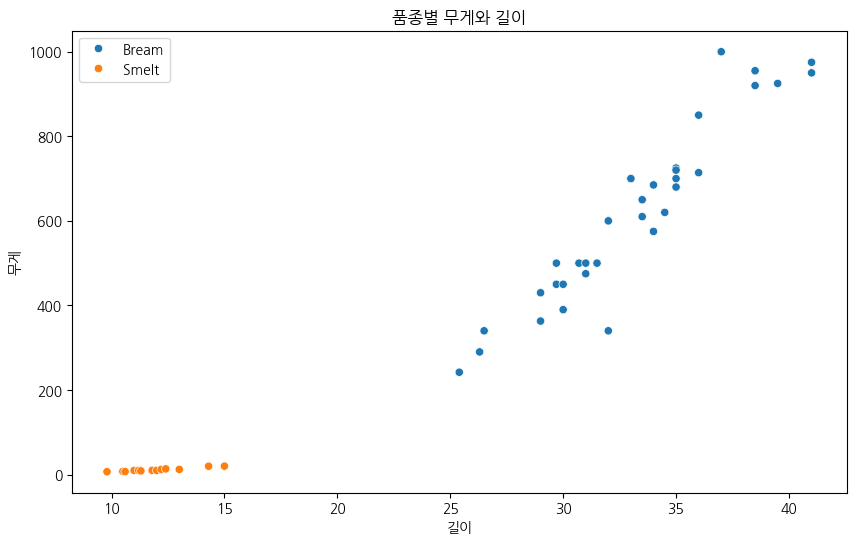

✓ 두 품종의 상관관계 : 
          Weight    Length
Weight  1.000000  0.960347
Length  0.960347  1.000000


In [10]:
# [1-3] 무게와 길이 피쳐와 품종 분류 가능 여부

# - 시각화
plt.figure(figsize=(10, 6))

sns.scatterplot(data=fishDF, x='Length', y='Weight', hue='Species')


plt.title('품종별 무게와 길이')
plt.xlabel('길이'); plt.ylabel('무게')

plt.legend(); 
plt.show()

# - 상관계수
print(f"✓ 두 품종의 상관관계 : \n{fishDF.corr(numeric_only=True)}")

In [ ]:
## [1-3] 무게와 같이 피쳐와 품종 분류 가능 여부
pd.set_option('future.no_silent_downcasting', True)

# 방법1: 카테고리 사용 
fishDF.loc[:, 'Species'] = fishDF.loc[:, 'Species'].replace({'Bream':0, 'Smelt':1})
fishDF.Species = fishDF.Species.astype('category')
fishDF.Species

## 즉, series일때는 map 함수, df일때는 replace 사용

## 방법2: 자동 변환 
# 이렇게 하면 replace, map 할 필요없음! 0,1로 알아서 매핑해주는게 cat.codes
fishDF['Species'].astype('category').cat.codes 

C:\Users\khw27\AppData\Local\Temp\ipykernel_33864\2709770052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishDF.Species = fishDF.Species.astype('category')


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
dtype: int8